<a href="https://colab.research.google.com/github/KhalidNazzar/Natural-Language-Processing/blob/main/Small_NLP_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-827de351-4c89-f97a-c181-e68635120027)


In [3]:
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys


In [5]:
data = "/content/nlp_getting_started.zip"
unzip_data(data)

In [6]:
import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [7]:
train_df_shuffled = train_df.sample(frac=1, random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [8]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [9]:
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [10]:
print(f"Total training samples: {len(train_df)}")
print(f"Total test samples: {len(test_df)}")
print(f"Total samples: {len(train_df) + len(test_df)}")

Total training samples: 7613
Total test samples: 3263
Total samples: 10876


In [11]:
import random
random_index = random.randint(0, len(train_df)-5) # create random indexes not higher than the total number of samples
for row in train_df_shuffled[["text", "target"]][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f"Target: {target}", "(real disaster)" if target > 0 else "(not real disaster)")
  print(f"Text:\n{text}\n")
  print("---\n")

Target: 1 (real disaster)
Text:
The Latest: More homes razed by Northern California wildfire - LancasterOnline http://t.co/ph7wllKRfI #Lancaster

---

Target: 1 (real disaster)
Text:
@FoxNews He still has his beard - has he been visited by any1 while in prison? If he keeps that hideous beard electrocute him! 
#UglyPeople

---

Target: 0 (not real disaster)
Text:
Another Mac vuln!

https://t.co/OxXRnaB8Un

---

Target: 0 (not real disaster)
Text:
My favorite text http://t.co/5U5GAkX2ch

---

Target: 0 (not real disaster)
Text:
@kg4vaal lmaov.v hard the 'Ny' is the the new trend babalmao...welcome to Nyozi kwaAaaA#dead

---



In [12]:
from sklearn.model_selection import train_test_split
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                            train_df_shuffled["target"].to_numpy(),
                                                                            test_size=0.1,
                                                                            random_state=42)


In [13]:
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

In [14]:
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

In [15]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization
text_vectorizer = TextVectorization(max_tokens=None,
                                    standardize="lower_and_strip_punctuation",
                                    split="whitespace",
                                    ngrams=None,
                                    output_mode="int",
                                    output_sequence_length=None)

In [16]:
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [18]:
max_vocab_length = 10000
max_length = 15

In [19]:
text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [20]:
text_vectorizer.adapt(train_sentences)

In [21]:
sample_sentence = "There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [22]:
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
@pattonoswalt @FoxNews Wait I thought Fecal Hurricane was on SciFi? Maybe that was turdnado. I've been forgeting up a shit storm lately.      

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[4951, 1410,  637,    8,  497,    1,  346,   23,   11, 3439,  680,
          16,   23, 7303,  276]])>

In [23]:
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5]
bottom_5_words = words_in_vocab[-5:]
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}")
print(f"Bottom 5 least common words: {bottom_5_words}")

Number of words in vocab: 10000
Top 5 most common words: ['', '[UNK]', 'the', 'a', 'in']
Bottom 5 least common words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


In [24]:
tf.random.set_seed(42)
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length,
                             output_dim=128,
                             embeddings_initializer="uniform",
                             input_length=max_length,
                             name="embedding_1")

embedding

In [25]:
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nEmbedded version:")

sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
Hail:The user summons a hailstorm lasting five turns. It damages all Pokemon except the Ice type.      

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.00348096, -0.01043787,  0.01842145, ..., -0.01742608,
          0.03901397,  0.0348263 ],
        [ 0.04612413, -0.04865411, -0.03883425, ...,  0.00217   ,
          0.04380714,  0.03492342],
        [-0.00065823,  0.04643248,  0.00247911, ..., -0.03668301,
          0.0430469 ,  0.02925772],
        ...,
        [ 0.02138552, -0.04742013,  0.02618429, ...,  0.02221746,
         -0.01008316, -0.04011009],
        [-0.00265191, -0.01508766, -0.03701522, ..., -0.04493933,
          0.04114547,  0.04163929],
        [-0.04867315, -0.0498112 ,  0.03261621, ...,  0.04723822,
          0.00281893, -0.00854124]]], dtype=float32)>

In [26]:
sample_embed[0][0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([ 0.00348096, -0.01043787,  0.01842145,  0.0335663 ,  0.0059059 ,
        0.04789015,  0.04092311, -0.00244498, -0.03759762,  0.00349624,
       -0.00185438, -0.00356946, -0.0371421 ,  0.01950881,  0.00408349,
        0.02755025,  0.02093382, -0.04395678,  0.02788845, -0.03038847,
        0.01673634,  0.00319678, -0.04741603,  0.00495972,  0.00789602,
        0.02055467,  0.02623219,  0.00084136, -0.02097112, -0.01961233,
        0.04138975, -0.03607862,  0.00258727,  0.01688644, -0.01285499,
       -0.02927728, -0.01596365, -0.03406739, -0.02790802,  0.01812691,
        0.04035733,  0.04362757,  0.01723481,  0.02810569,  0.038265  ,
        0.02877462, -0.00267731, -0.03309925,  0.04518631, -0.04262364,
       -0.03359325, -0.04058785,  0.01602702, -0.02962391, -0.0295658 ,
        0.0124919 ,  0.04660959,  0.04850384, -0.0494231 , -0.04954899,
        0.02840981,  0.04577768,  0.03868126,  0.02479086, -0.04755079,
        0.003950

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()),
                    ("clf", MultinomialNB())
])

model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [28]:
baseline_score = model_0.score(val_sentences, val_labels)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 79.27%


In [29]:
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [30]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [31]:
baseline_results = calculate_results(y_true=val_labels,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

In [32]:
from helper_functions import create_tensorboard_callback

SAVE_DIR = "model_logs"

In [33]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense")

In [34]:
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [35]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [36]:
model_1_history = model_1.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="simple_dense_model")])

Saving TensorBoard log files to: model_logs/simple_dense_model/20230721-050645
Epoch 1/5
215/215 [==============================] - 24s 80ms/step - loss: 0.6110 - accuracy: 0.6917 - val_loss: 0.5372 - val_accuracy: 0.7533
Epoch 2/5
215/215 [==============================] - 3s 13ms/step - loss: 0.4421 - accuracy: 0.8187 - val_loss: 0.4695 - val_accuracy: 0.7808
Epoch 3/5
215/215 [==============================] - 4s 17ms/step - loss: 0.3471 - accuracy: 0.8605 - val_loss: 0.4591 - val_accuracy: 0.7887
Epoch 4/5
215/215 [==============================] - 3s 14ms/step - loss: 0.2855 - accuracy: 0.8915 - val_loss: 0.4640 - val_accuracy: 0.7887
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.2386 - accuracy: 0.9120 - val_loss: 0.4763 - val_accuracy: 0.7861


In [37]:
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 3ms/step - loss: 0.4763 - accuracy: 0.7861


[0.4762537479400635, 0.7860892415046692]

In [38]:
embedding.weights

[<tf.Variable 'embedding_1/embeddings:0' shape=(10000, 128) dtype=float32, numpy=
 array([[ 0.03535835,  0.01830684, -0.01038087, ..., -0.06245197,
         -0.00651375, -0.06503526],
        [ 0.01294828, -0.01929721,  0.01095549, ..., -0.02610454,
          0.04703813,  0.02567323],
        [ 0.01278071, -0.02948612, -0.05725318, ..., -0.06051355,
          0.05662853,  0.0263506 ],
        ...,
        [ 0.01994759, -0.0287775 ,  0.01282555, ..., -0.02439374,
          0.01038157, -0.02850593],
        [ 0.06069755, -0.01063116, -0.02674834, ..., -0.07682067,
          0.01845124, -0.0581959 ],
        [ 0.06864524, -0.0683782 , -0.08525361, ..., -0.05289538,
          0.0278071 , -0.11336882]], dtype=float32)>]

In [39]:
embed_weights = model_1.get_layer("embedding_1").get_weights()[0]
print(embed_weights.shape)

(10000, 128)


In [40]:
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs[:10]

24/24 [==============================] - 0s 2ms/step


array([[0.40506536],
       [0.74458677],
       [0.9977537 ],
       [0.10897088],
       [0.0995679 ],
       [0.93650097],
       [0.91270494],
       [0.99254084],
       [0.97038954],
       [0.27118745]], dtype=float32)

In [41]:
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1.], dtype=float32)>

In [42]:
model_1_results = calculate_results(y_true=val_labels,
                                    y_pred=model_1_preds)
model_1_results

{'accuracy': 78.60892388451444,
 'precision': 0.7903277546022673,
 'recall': 0.7860892388451444,
 'f1': 0.7832971347503846}

In [43]:
import numpy as np
np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False, False])

In [44]:
def compare_baseline_to_new_results(baseline_results, new_model_results):
  for key, value in baseline_results.items():
    print(f"Baseline {key}: {value:.2f}, New {key}: {new_model_results[key]:.2f}, Difference: {new_model_results[key]-value:.2f}")

compare_baseline_to_new_results(baseline_results=baseline_results,
                                new_model_results=model_1_results)

Baseline accuracy: 79.27, New accuracy: 78.61, Difference: -0.66
Baseline precision: 0.81, New precision: 0.79, Difference: -0.02
Baseline recall: 0.79, New recall: 0.79, Difference: -0.01
Baseline f1: 0.79, New f1: 0.78, Difference: -0.00


In [45]:
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]


(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [46]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [47]:
embed_weights = model_1.get_layer("embedding_1").get_weights()[0]
print(embed_weights.shape)

(10000, 128)


In [48]:
# Code below is adapted from: https://www.tensorflow.org/tutorials/text/word_embeddings#retrieve_the_trained_word_embeddings_and_save_them_to_disk
import io

out_v = io.open("embedding_vectors.tsv", "w", encoding="utf-8")
out_m = io.open("embedding_metadata.tsv", "w", encoding="utf-8")

for num, word in enumerate(words_in_vocab):
  if num == 0:
     continue
  vec = embed_weights[num]
  out_m.write(word + "\n")
  out_v.write("\t".join([str(x) for x in vec]) + "\n")
out_v.close()
out_m.close()

try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download("embedding_vectors.tsv")
  files.download("embedding_metadata.tsv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [49]:
tf.random.set_seed(42)
from tensorflow.keras import layers
model_2_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_2")


inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_2_embedding(x)
print(x.shape)
x = layers.LSTM(64)(x)
print(x.shape)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")

(None, 15, 128)
(None, 64)


In [50]:
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [51]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_2 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
____________________________________________

In [52]:
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "LSTM")])


Saving TensorBoard log files to: model_logs/LSTM/20230721-051825
Epoch 1/5
215/215 [==============================] - 23s 87ms/step - loss: 0.5108 - accuracy: 0.7466 - val_loss: 0.4609 - val_accuracy: 0.7769
Epoch 2/5
215/215 [==============================] - 4s 18ms/step - loss: 0.3181 - accuracy: 0.8704 - val_loss: 0.5155 - val_accuracy: 0.7743
Epoch 3/5
215/215 [==============================] - 3s 14ms/step - loss: 0.2216 - accuracy: 0.9155 - val_loss: 0.5791 - val_accuracy: 0.7612
Epoch 4/5
215/215 [==============================] - 3s 14ms/step - loss: 0.1589 - accuracy: 0.9450 - val_loss: 0.6435 - val_accuracy: 0.7703
Epoch 5/5
215/215 [==============================] - 3s 14ms/step - loss: 0.1132 - accuracy: 0.9593 - val_loss: 0.7894 - val_accuracy: 0.7572


In [53]:
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs.shape, model_2_pred_probs[:10]

24/24 [==============================] - 1s 3ms/step


((762, 1),
 array([[0.06306713],
        [0.7526253 ],
        [0.99858475],
        [0.0649203 ],
        [0.00665189],
        [0.9987613 ],
        [0.65291435],
        [0.9995278 ],
        [0.9992787 ],
        [0.31858075]], dtype=float32))

In [54]:
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [55]:
model_2_results = calculate_results(y_true=val_labels,
                                    y_pred=model_2_preds)
model_2_results

{'accuracy': 75.7217847769029,
 'precision': 0.7574646046920478,
 'recall': 0.7572178477690289,
 'f1': 0.7557133417830907}

In [56]:
compare_baseline_to_new_results(baseline_results, model_2_results)


Baseline accuracy: 79.27, New accuracy: 75.72, Difference: -3.54
Baseline precision: 0.81, New precision: 0.76, Difference: -0.05
Baseline recall: 0.79, New recall: 0.76, Difference: -0.04
Baseline f1: 0.79, New f1: 0.76, Difference: -0.03


In [57]:
tf.random.set_seed(42)
from tensorflow.keras import layers
model_3_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_3")

inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_3_embedding(x)
x = layers.GRU(64)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")

In [58]:
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [59]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_3 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_____________________________________________

In [60]:
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "GRU")])

Saving TensorBoard log files to: model_logs/GRU/20230721-052041
Epoch 1/5
215/215 [==============================] - 17s 61ms/step - loss: 0.5228 - accuracy: 0.7343 - val_loss: 0.4543 - val_accuracy: 0.7795
Epoch 2/5
215/215 [==============================] - 3s 14ms/step - loss: 0.3173 - accuracy: 0.8710 - val_loss: 0.4962 - val_accuracy: 0.7795
Epoch 3/5
215/215 [==============================] - 3s 16ms/step - loss: 0.2177 - accuracy: 0.9181 - val_loss: 0.5674 - val_accuracy: 0.7717
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1566 - accuracy: 0.9448 - val_loss: 0.6200 - val_accuracy: 0.7795
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1197 - accuracy: 0.9599 - val_loss: 0.6021 - val_accuracy: 0.7730


In [61]:
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs.shape, model_3_pred_probs[:10]

24/24 [==============================] - 0s 3ms/step


((762, 1),
 array([[0.44952682],
        [0.8915279 ],
        [0.9968232 ],
        [0.14830008],
        [0.01435698],
        [0.98766965],
        [0.70716673],
        [0.9969382 ],
        [0.9969957 ],
        [0.4792969 ]], dtype=float32))

In [62]:
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [63]:
model_3_results = calculate_results(y_true=val_labels,
                                    y_pred=model_3_preds)
model_3_results

{'accuracy': 77.29658792650919,
 'precision': 0.7727692945264432,
 'recall': 0.7729658792650919,
 'f1': 0.7721544244341451}

In [64]:
compare_baseline_to_new_results(baseline_results, model_3_results)

Baseline accuracy: 79.27, New accuracy: 77.30, Difference: -1.97
Baseline precision: 0.81, New precision: 0.77, Difference: -0.04
Baseline recall: 0.79, New recall: 0.77, Difference: -0.02
Baseline f1: 0.79, New f1: 0.77, Difference: -0.01


In [65]:
tf.random.set_seed(42)
from tensorflow.keras import layers
model_4_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_4")

inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_4_embedding(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name="model_4_Bidirectional")

In [66]:
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [67]:
model_4.summary()

Model: "model_4_Bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_4 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params: 1,3

In [68]:
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "bidirectional_RNN")])

Saving TensorBoard log files to: model_logs/bidirectional_RNN/20230721-052221
Epoch 1/5
215/215 [==============================] - 19s 67ms/step - loss: 0.5072 - accuracy: 0.7451 - val_loss: 0.4571 - val_accuracy: 0.7874
Epoch 2/5
215/215 [==============================] - 3s 14ms/step - loss: 0.3113 - accuracy: 0.8752 - val_loss: 0.5279 - val_accuracy: 0.7743
Epoch 3/5
215/215 [==============================] - 5s 23ms/step - loss: 0.2126 - accuracy: 0.9196 - val_loss: 0.5611 - val_accuracy: 0.7677
Epoch 4/5
215/215 [==============================] - 2s 11ms/step - loss: 0.1443 - accuracy: 0.9508 - val_loss: 0.6494 - val_accuracy: 0.7822
Epoch 5/5
215/215 [==============================] - 3s 12ms/step - loss: 0.1038 - accuracy: 0.9645 - val_loss: 0.6798 - val_accuracy: 0.7638


In [69]:
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

24/24 [==============================] - 1s 5ms/step


array([[0.04542399],
       [0.7853094 ],
       [0.9991824 ],
       [0.11154328],
       [0.00427066],
       [0.991561  ],
       [0.6553215 ],
       [0.99936897],
       [0.9992562 ],
       [0.13623294]], dtype=float32)

In [70]:
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [71]:
model_4_results = calculate_results(val_labels, model_4_preds)
model_4_results

{'accuracy': 76.37795275590551,
 'precision': 0.7639261289761722,
 'recall': 0.7637795275590551,
 'f1': 0.7624822674694383}

In [72]:
compare_baseline_to_new_results(baseline_results, model_4_results)

Baseline accuracy: 79.27, New accuracy: 76.38, Difference: -2.89
Baseline precision: 0.81, New precision: 0.76, Difference: -0.05
Baseline recall: 0.79, New recall: 0.76, Difference: -0.03
Baseline f1: 0.79, New f1: 0.76, Difference: -0.02


In [73]:
embedding_test = embedding(text_vectorizer(["this is a test sentence"]))
conv_1d = layers.Conv1D(filters=32, kernel_size=5, activation="relu")
conv_1d_output = conv_1d(embedding_test)
max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv_1d_output)
embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

In [74]:
embedding_test[:1], conv_1d_output[:1], max_pool_output[:1]

(<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
 array([[[-0.00472675, -0.04142302, -0.018166  , ...,  0.02204794,
          -0.04506901, -0.04079606],
         [ 0.04510831,  0.00015539, -0.09187682, ..., -0.06384395,
           0.01778406, -0.07854376],
         [ 0.05396516, -0.01510123, -0.04638826, ..., -0.01008125,
           0.03390513,  0.01833731],
         ...,
         [ 0.03535835,  0.01830684, -0.01038087, ..., -0.06245197,
          -0.00651375, -0.06503526],
         [ 0.03535835,  0.01830684, -0.01038087, ..., -0.06245197,
          -0.00651375, -0.06503526],
         [ 0.03535835,  0.01830684, -0.01038087, ..., -0.06245197,
          -0.00651375, -0.06503526]]], dtype=float32)>,
 <tf.Tensor: shape=(1, 11, 32), dtype=float32, numpy=
 array([[[0.14951462, 0.05087801, 0.08133078, 0.0446554 , 0.        ,
          0.00619939, 0.09803305, 0.        , 0.        , 0.06523378,
          0.02028177, 0.03750827, 0.        , 0.        , 0.01253638,
          0.        , 0.

In [75]:
tf.random.set_seed(42)
from tensorflow.keras import layers
model_5_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_5")

from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_5_embedding(x)
x = layers.Conv1D(filters=32, kernel_size=5, activation="relu")(x)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_Conv1D")

model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_5 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 32)            20512     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_4 (Dense)             (None, 1)              

In [76]:
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "Conv1D")])

Saving TensorBoard log files to: model_logs/Conv1D/20230721-052435
Epoch 1/5
215/215 [==============================] - 16s 58ms/step - loss: 0.5643 - accuracy: 0.7187 - val_loss: 0.4727 - val_accuracy: 0.7795
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3399 - accuracy: 0.8606 - val_loss: 0.4716 - val_accuracy: 0.7848
Epoch 3/5
215/215 [==============================] - 4s 20ms/step - loss: 0.2124 - accuracy: 0.9212 - val_loss: 0.5337 - val_accuracy: 0.7703
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1374 - accuracy: 0.9536 - val_loss: 0.6101 - val_accuracy: 0.7743
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0957 - accuracy: 0.9679 - val_loss: 0.6638 - val_accuracy: 0.7848


In [77]:
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

24/24 [==============================] - 0s 3ms/step


array([[0.6069633 ],
       [0.7273668 ],
       [0.9990044 ],
       [0.04893457],
       [0.00437107],
       [0.9954046 ],
       [0.8907514 ],
       [0.99701536],
       [0.99961805],
       [0.42357606]], dtype=float32)

In [78]:
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [79]:
model_5_results = calculate_results(y_true=val_labels,
                                    y_pred=model_5_preds)
model_5_results

{'accuracy': 78.4776902887139,
 'precision': 0.7880247798695493,
 'recall': 0.7847769028871391,
 'f1': 0.7823139263800303}

In [80]:
compare_baseline_to_new_results(baseline_results, model_5_results)

Baseline accuracy: 79.27, New accuracy: 78.48, Difference: -0.79
Baseline precision: 0.81, New precision: 0.79, Difference: -0.02
Baseline recall: 0.79, New recall: 0.78, Difference: -0.01
Baseline f1: 0.79, New f1: 0.78, Difference: -0.00


In [81]:
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embed_samples = embed([sample_sentence,
                      "When you call the universal sentence encoder on a sentence, it turns it into numbers."])

print(embed_samples[0][:50])


tf.Tensor(
[-0.01157028  0.0248591   0.02878048 -0.012715    0.03971538  0.0882776
  0.02680984  0.05589836 -0.0106873  -0.00597291  0.00639323 -0.01819518
  0.00030813  0.09105888  0.05874644 -0.03180628  0.01512474 -0.05162929
  0.00991367 -0.06865347 -0.04209306  0.02678981  0.03011006  0.00321069
 -0.00337973 -0.04787357  0.0226672  -0.00985925 -0.04063613 -0.01292092
 -0.04666384  0.05630299 -0.03949255  0.00517686  0.02495829 -0.0701444
  0.02871508  0.04947684 -0.00633979 -0.08960192  0.02807118 -0.00808364
 -0.01360602  0.0599865  -0.10361787 -0.05195374  0.00232954 -0.02332531
 -0.03758105  0.03327728], shape=(50,), dtype=float32)


In [82]:
embed_samples[0].shape

TensorShape([512])

In [83]:
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=False,
                                        name="USE")

In [84]:
model_6 = tf.keras.Sequential([
  sentence_encoder_layer,
  layers.Dense(64, activation="relu"),
  layers.Dense(1, activation="sigmoid")
], name="model_6_USE")

model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_6.summary()


Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [85]:
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20230721-052714
Epoch 1/5
215/215 [==============================] - 9s 20ms/step - loss: 0.5023 - accuracy: 0.7885 - val_loss: 0.4482 - val_accuracy: 0.7966
Epoch 2/5
215/215 [==============================] - 4s 19ms/step - loss: 0.4152 - accuracy: 0.8145 - val_loss: 0.4372 - val_accuracy: 0.8084
Epoch 3/5
215/215 [==============================] - 3s 14ms/step - loss: 0.4008 - accuracy: 0.8215 - val_loss: 0.4330 - val_accuracy: 0.8110
Epoch 4/5
215/215 [==============================] - 5s 25ms/step - loss: 0.3939 - accuracy: 0.8269 - val_loss: 0.4287 - val_accuracy: 0.8110
Epoch 5/5
215/215 [==============================] - 4s 18ms/step - loss: 0.3881 - accuracy: 0.8297 - val_loss: 0.4303 - val_accuracy: 0.8176


In [86]:
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]

24/24 [==============================] - 1s 17ms/step


array([[0.15583232],
       [0.7525465 ],
       [0.9847978 ],
       [0.21246554],
       [0.7380199 ],
       [0.6753766 ],
       [0.97855604],
       [0.9742484 ],
       [0.9169388 ],
       [0.09046359]], dtype=float32)

In [87]:
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [88]:
model_6_results = calculate_results(val_labels, model_6_preds)
model_6_results

{'accuracy': 81.75853018372703,
 'precision': 0.8199411418946955,
 'recall': 0.8175853018372703,
 'f1': 0.8160820787192251}

In [89]:
compare_baseline_to_new_results(baseline_results, model_6_results)

Baseline accuracy: 79.27, New accuracy: 81.76, Difference: 2.49
Baseline precision: 0.81, New precision: 0.82, Difference: 0.01
Baseline recall: 0.79, New recall: 0.82, Difference: 0.02
Baseline f1: 0.79, New f1: 0.82, Difference: 0.03


In [90]:
train_sentences_90_percent, train_sentences_10_percent, train_labels_90_percent, train_labels_10_percent = train_test_split(np.array(train_sentences),
                                                                                                                            train_labels,
                                                                                                                            test_size=0.1,
                                                                                                                            random_state=42)


In [91]:
print(f"Total training examples: {len(train_sentences)}")
print(f"Length of 10% training examples: {len(train_sentences_10_percent)}")

Total training examples: 6851
Length of 10% training examples: 686


In [92]:
pd.Series(train_labels_10_percent).value_counts()

0    415
1    271
dtype: int64

In [93]:
model_7 = tf.keras.models.clone_model(model_6)

model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_7.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [94]:
model_7_history = model_7.fit(x=train_sentences_10_percent,
                              y=train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "10_percent_tf_hub_sentence_encoder")])


Saving TensorBoard log files to: model_logs/10_percent_tf_hub_sentence_encoder/20230721-053028
Epoch 1/5
22/22 [==============================] - 6s 49ms/step - loss: 0.6730 - accuracy: 0.7143 - val_loss: 0.6528 - val_accuracy: 0.7034
Epoch 2/5
22/22 [==============================] - 1s 28ms/step - loss: 0.6001 - accuracy: 0.8163 - val_loss: 0.5925 - val_accuracy: 0.7454
Epoch 3/5
22/22 [==============================] - 1s 27ms/step - loss: 0.5192 - accuracy: 0.8294 - val_loss: 0.5358 - val_accuracy: 0.7677
Epoch 4/5
22/22 [==============================] - 1s 40ms/step - loss: 0.4522 - accuracy: 0.8338 - val_loss: 0.5044 - val_accuracy: 0.7717
Epoch 5/5
22/22 [==============================] - 1s 47ms/step - loss: 0.4082 - accuracy: 0.8397 - val_loss: 0.4880 - val_accuracy: 0.7782


In [95]:
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:10]

24/24 [==============================] - 2s 26ms/step


array([[0.24508539],
       [0.79343027],
       [0.91124076],
       [0.29782602],
       [0.55517894],
       [0.8492666 ],
       [0.83157843],
       [0.83392614],
       [0.8295391 ],
       [0.12349252]], dtype=float32)

In [96]:
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [97]:
model_7_results = calculate_results(val_labels, model_7_preds)
model_7_results

{'accuracy': 77.82152230971128,
 'precision': 0.7833771178803304,
 'recall': 0.7782152230971129,
 'f1': 0.7748637513129987}

In [98]:
compare_baseline_to_new_results(baseline_results, model_7_results)

Baseline accuracy: 79.27, New accuracy: 77.82, Difference: -1.44
Baseline precision: 0.81, New precision: 0.78, Difference: -0.03
Baseline recall: 0.79, New recall: 0.78, Difference: -0.01
Baseline f1: 0.79, New f1: 0.77, Difference: -0.01


In [99]:
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "simple_dense": model_1_results,
                                  "lstm": model_2_results,
                                  "gru": model_3_results,
                                  "bidirectional": model_4_results,
                                  "conv1d": model_5_results,
                                  "tf_hub_sentence_encoder": model_6_results,
                                  "tf_hub_10_percent_data": model_7_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
baseline,79.265092,0.811139,0.792651,0.786219
simple_dense,78.608924,0.790328,0.786089,0.783297
lstm,75.721785,0.757465,0.757218,0.755713
gru,77.296588,0.772769,0.772966,0.772154
bidirectional,76.377953,0.763926,0.763780,0.762482
conv1d,78.477690,0.788025,0.784777,0.782314
tf_hub_sentence_encoder,81.758530,0.819941,0.817585,0.816082
tf_hub_10_percent_data,77.821522,0.783377,0.778215,0.774864


In [100]:
all_model_results["accuracy"] = all_model_results["accuracy"]/100

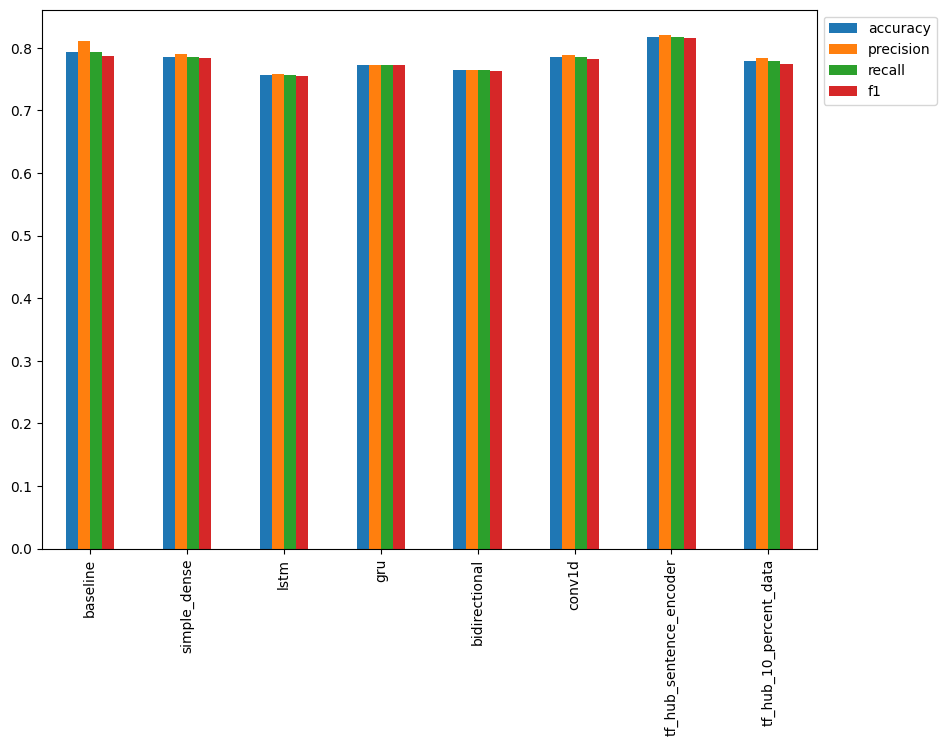

In [101]:
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

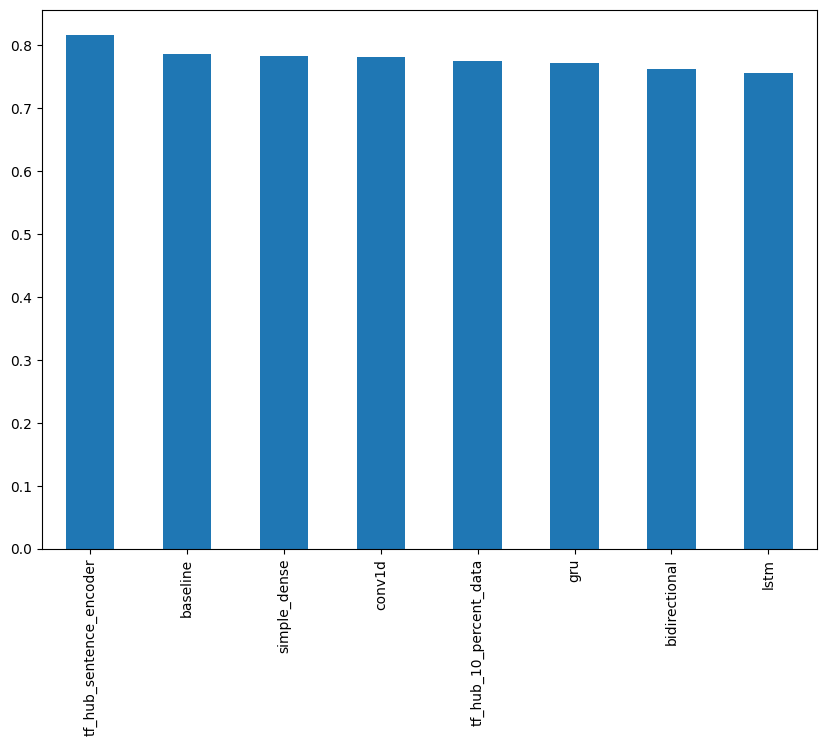

In [102]:
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10, 7));

In [103]:
!tensorboard dev upload --logdir ./model_logs \
  --name "NLP modelling experiments" \
  --description "A series of different NLP modellings experiments with various models" \
  --one_shot

2023-07-21 05:32:46.613632: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./model_logs

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

To sign in with the TensorBoard uploader:

1. On your computer or phone, visit:

   https://www.google.com/device

2. Sign in with your Google account, then enter:

   MRLN-CHSK

khalid.nazzar@gmail.com
qazwsxplm



New experiment created. View your TensorBoard at

In [104]:
!tensorboard dev delete --experiment_id EXPERIMENT_ID_TO_DELETE

2023-07-21 05:36:22.092293: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Internal error deleting experiment EXPERIMENT_ID_TO_DELETE: <_InactiveRpcError of RPC that terminated with:
	status = StatusCode.INVALID_ARGUMENT
	details = "Invalid experiment ID: 'EXPERIMENT_ID_TO_DELETE'"
	debug_error_string = "UNKNOWN:Error received from peer ipv4:34.95.66.171:443 {grpc_message:"Invalid experiment ID: \'EXPERIMENT_ID_TO_DELETE\'", grpc_status:3, created_time:"2023-07-21T05:36:24.059261973+00:00"}"
>.



In [105]:
baseline_pred_probs = np.max(model_0.predict_proba(val_sentences), axis=1)
combined_pred_probs = baseline_pred_probs + tf.squeeze(model_2_pred_probs, axis=1) + tf.squeeze(model_6_pred_probs)
combined_preds = tf.round(combined_pred_probs/3)
combined_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1.], dtype=float32)>

In [106]:
ensemble_results = calculate_results(val_labels, combined_preds)
ensemble_results

{'accuracy': 78.34645669291339,
 'precision': 0.7832652743452122,
 'recall': 0.7834645669291339,
 'f1': 0.7833310198858764}

In [107]:
all_model_results.loc["ensemble_results"] = ensemble_results

In [108]:
all_model_results.loc["ensemble_results"]["accuracy"] = all_model_results.loc["ensemble_results"]["accuracy"]/100

In [109]:
all_model_results

,accuracy,precision,recall,f1
baseline,0.792651,0.811139,0.792651,0.786219
simple_dense,0.786089,0.790328,0.786089,0.783297
lstm,0.757218,0.757465,0.757218,0.755713
gru,0.772966,0.772769,0.772966,0.772154
bidirectional,0.763780,0.763926,0.763780,0.762482
conv1d,0.784777,0.788025,0.784777,0.782314
tf_hub_sentence_encoder,0.817585,0.819941,0.817585,0.816082
tf_hub_10_percent_data,0.778215,0.783377,0.778215,0.774864
ensemble_results,0.783465,0.783265,0.783465,0.783331


In [110]:
model_6.save("model_6.h5")

In [111]:
loaded_model_6 = tf.keras.models.load_model("model_6.h5",
                                            custom_objects={"KerasLayer": hub.KerasLayer})

In [112]:
loaded_model_6.evaluate(val_sentences, val_labels)

24/24 [==============================] - 2s 30ms/step - loss: 0.4303 - accuracy: 0.8176


[0.43030238151550293, 0.817585289478302]

In [113]:
model_6.save("model_6_SavedModel_format")

In [114]:
loaded_model_6_SavedModel = tf.keras.models.load_model("model_6_SavedModel_format")

In [115]:
loaded_model_6_SavedModel.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 12ms/step - loss: 0.4303 - accuracy: 0.8176


[0.43030238151550293, 0.817585289478302]

In [116]:
val_df = pd.DataFrame({"text": val_sentences,
                       "target": val_labels,
                       "pred": model_6_preds,
                       "pred_prob": tf.squeeze(model_6_pred_probs)})
val_df.head()

,text,target,pred,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.155832
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.752546
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.984798
3,@camilacabello97 Internally and externally scr...,1,0.0,0.212466
4,Radiation emergency #preparedness starts with ...,1,1.0,0.738020


In [117]:
most_wrong = val_df[val_df["target"] != val_df["pred"]].sort_values("pred_prob", ascending=False)
most_wrong[:10]

,text,target,pred,pred_prob
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.907664
759,FedEx will no longer transport bioterror patho...,0,1.0,0.857043
393,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.847612
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.835499
628,@noah_anyname That's where the concentration c...,0,1.0,0.829960
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.815663
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.793250
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.783852
698,åÈMGN-AFRICAå¨ pin:263789F4 åÈ Correction: Ten...,0,1.0,0.777773
567,@RebeccaforReal accepts Wisconsin Emergency Re...,0,1.0,0.764941


In [118]:
for row in most_wrong[:10].itertuples():
  _, text, target, pred, prob = row
  print(f"Target: {target}, Pred: {int(pred)}, Prob: {prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target: 0, Pred: 1, Prob: 0.9076642990112305
Text:
? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

----

Target: 0, Pred: 1, Prob: 0.8570426106452942
Text:
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

----

Target: 0, Pred: 1, Prob: 0.8476117253303528
Text:
@SonofLiberty357 all illuminated by the brightly burning buildings all around the town!

----

Target: 0, Pred: 1, Prob: 0.8354989290237427
Text:
@madonnamking RSPCA site multiple 7 story high rise buildings next to low density character residential in an area that floods

----

Target: 0, Pred: 1, Prob: 0.829960286617279
Text:
@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

----

Target: 0, Pred: 1, Prob: 0.815662682056427
Text:
Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0

----

Target: 0, Pred: 1, Prob

In [119]:
test_sentences = test_df["text"].to_list()
test_samples = random.sample(test_sentences, 10)
for test_sample in test_samples:
  pred_prob = tf.squeeze(model_6.predict([test_sample]))
  pred = tf.round(pred_prob)
  print(f"Pred: {int(pred)}, Prob: {pred_prob}")
  print(f"Text:\n{test_sample}\n")
  print("----\n")

1/1 [==============================] - 0s 83ms/step
Pred: 1, Prob: 0.7360602617263794
Text:
Who is Tomislav Salopek the Islamic State's Most Recent Hostage? http://t.co/puT3LgsDnf

----

1/1 [==============================] - 0s 65ms/step
Pred: 0, Prob: 0.21439063549041748
Text:
@Dat_Vi fear of the unknown eh.

----

1/1 [==============================] - 0s 80ms/step
Pred: 0, Prob: 0.048683758825063705
Text:
so keep calling me crazy
cause I never learned
you should stop loving fire
because you got burnedÛ_ https://t.co/ZsAEGjQq1z

----

1/1 [==============================] - 0s 72ms/step
Pred: 0, Prob: 0.25677233934402466
Text:
Rip to whoevers face that crashed in front of my work. Wish I could have helped

----

1/1 [==============================] - 0s 73ms/step
Pred: 0, Prob: 0.08082998543977737
Text:
I have never screamed nor cried so much at one concert

----

1/1 [==============================] - 0s 73ms/step
Pred: 0, Prob: 0.07563181966543198
Text:
Mouna gonna get me in troub

In [120]:
khalids_tweet = "Life like an ensemble: take the best choices from others and make your own"

In [121]:
def predict_on_sentence(model, sentence):
  """
  Uses model to make a prediction on sentence.

  Returns the sentence, the predicted label and the prediction probability.
  """
  pred_prob = model.predict([sentence])
  pred_label = tf.squeeze(tf.round(pred_prob)).numpy()
  print(f"Pred: {pred_label}", "(real disaster)" if pred_label > 0 else "(not real disaster)", f"Prob: {pred_prob[0][0]}")
  print(f"Text:\n{sentence}")

In [123]:
predict_on_sentence(model=model_6,
                    sentence=khalids_tweet)

1/1 [==============================] - 0s 187ms/step
Pred: 0.0 (not real disaster) Prob: 0.04108484089374542
Text:
Life like an ensemble: take the best choices from others and make your own


In [124]:
# Source - https://twitter.com/BeirutCityGuide/status/1290696551376007168
beirut_tweet_1 = "Reports that the smoke in Beirut sky contains nitric acid, which is toxic. Please share and refrain from stepping outside unless urgent. #Lebanon"

# Source - https://twitter.com/BeirutCityGuide/status/1290773498743476224
beirut_tweet_2 = "#Beirut declared a “devastated city”, two-week state of emergency officially declared. #Lebanon"


In [125]:
predict_on_sentence(model=model_6,
                    sentence=beirut_tweet_1)

1/1 [==============================] - 0s 43ms/step
Pred: 1.0 (real disaster) Prob: 0.9585464596748352
Text:
Reports that the smoke in Beirut sky contains nitric acid, which is toxic. Please share and refrain from stepping outside unless urgent. #Lebanon


In [126]:
predict_on_sentence(model=model_6,
                    sentence=beirut_tweet_2)

1/1 [==============================] - 0s 44ms/step
Pred: 1.0 (real disaster) Prob: 0.9679272174835205
Text:
#Beirut declared a “devastated city”, two-week state of emergency officially declared. #Lebanon


In [127]:
import time
def pred_timer(model, samples):
  """
  Times how long a model takes to make predictions on samples.

  Args:
  ----
  model = a trained model
  sample = a list of samples

  Returns:
  ----
  total_time = total elapsed time for model to make predictions on samples
  time_per_pred = time in seconds per single sample
  """
  start_time = time.perf_counter() # get start time
  model.predict(samples) # make predictions
  end_time = time.perf_counter() # get finish time
  total_time = end_time-start_time # calculate how long predictions took to make
  time_per_pred = total_time/len(val_sentences) # find prediction time per sample
  return total_time, time_per_pred

In [128]:
model_6_total_pred_time, model_6_time_per_pred = pred_timer(model_6, val_sentences)
model_6_total_pred_time, model_6_time_per_pred

24/24 [==============================] - 0s 15ms/step


(0.43594457200015313, 0.0005721057375330093)

In [129]:
baseline_total_pred_time, baseline_time_per_pred = pred_timer(model_0, val_sentences)
baseline_total_pred_time, baseline_time_per_pred

(0.02917909600000712, 3.8292776902896486e-05)

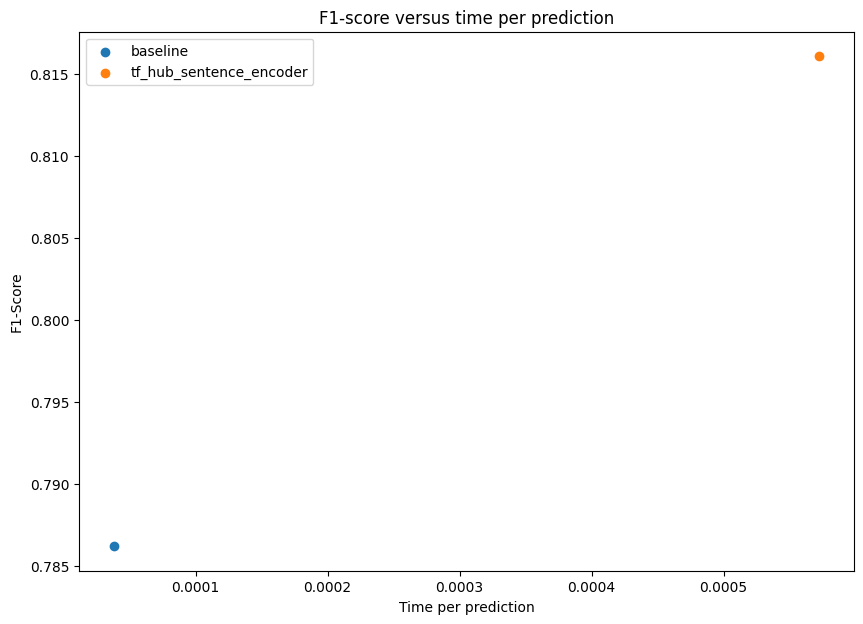

In [130]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(baseline_time_per_pred, baseline_results["f1"], label="baseline")
plt.scatter(model_6_time_per_pred, model_6_results["f1"], label="tf_hub_sentence_encoder")
plt.legend()
plt.title("F1-score versus time per prediction")
plt.xlabel("Time per prediction")
plt.ylabel("F1-Score");